In [1]:
base_url = "..//dataset//"

# Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import seaborn as sns
import scipy.stats as stat
import pylab 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import joblib
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import scipy.stats as stat
import pylab 

# Agenda

1. Use Variance Threshold to see which features have minimal variance 

2. Corelation Analysis

3. Mutual Information Analysis

4. Chi Square Analysis

5. Model Based Methods (Random Forests, Lasso)

6. Transformations(Log, Reciprocal, Box Cox etc) on selected features

7. Final Pipeline

# Loading the data

In [3]:
df = pd.read_csv(base_url+'phishing_full.csv')

In [4]:
features_to_skip = ['time_response','domain_spf','asn_ip','time_domain_expiration','qty_ip_resolved','qty_nameservers',
                   'qty_mx_servers','ttl_hostname','tls_ssl_certificate','qty_redirects','url_google_index','domain_google_index','url_shortened']

In [5]:
list(df.columns).index('time_response')

97

In [6]:
df.drop(features_to_skip,axis=1, inplace=True)

In [7]:
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_domain_activation,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,579,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,2,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,6998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,23,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,23,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,5509,0
88643,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,34,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,5046,0
88644,2,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,22,0,0,1,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1

# Create Train and Test Data (Using stratified Shuffle Split)

In [8]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [9]:
for train_index,test_index in split.split(df, df['phishing']):
    print(train_index,test_index)

[81747 18230  9266 ... 52746 80226 27947] [18921 74673 19334 ... 68007 58349 38230]


In [10]:
for train_index,test_index in split.split(df, df['phishing']):
    X_train = df.loc[train_index]
    X_test = df.loc[test_index]

In [11]:
X_train, y_train = X_train.drop(['phishing'],axis = 1),X_train['phishing']

In [12]:
X_test, y_test = X_test.drop(['phishing'],axis = 1),X_test['phishing']

# Standardization

In [13]:
sc = StandardScaler()

In [14]:
X_train = sc.fit_transform(X_train)

In [15]:
X_test = sc.transform(X_test)

In [16]:
cols = df.drop(['phishing'],axis=1).columns

In [17]:
X_train = pd.DataFrame(X_train, columns=cols)

In [18]:
X_test = pd.DataFrame(X_test, columns=cols)

# 1. Dropping Constant features - Variance Threshold

In this step we will be removing the features which have constant features which are actually not important for solving the problem statement.

We remove those features, which have very minimal variance. That simply means that these features are constant

In [19]:
from sklearn.feature_selection import VarianceThreshold

In [20]:
var_thresh_obj = VarianceThreshold(threshold=0)

In [21]:
var_thresh_obj.fit(X_train)

VarianceThreshold(threshold=0)

In [22]:
var_thresh_obj.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [23]:
constant_columns = [column for column in X_train.columns if column not in set(X_train.columns[var_thresh_obj.get_support()])]

In [24]:
constant_columns

['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain']

#### We are not going to use these features and we will drop these

# 2. Corelation Analysis

******
If an Independant feature and dependant feature are corelated, that is desireable

If 2 independant features are corelated, we can easily drop one as it reduces Curse of Dimesnionality, also reduces Multi Colinearity

******

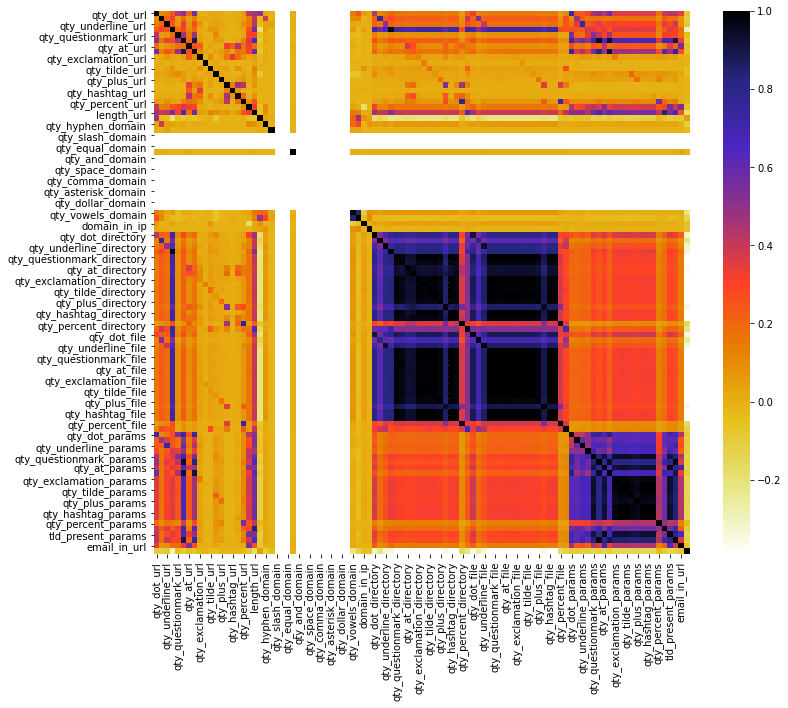

In [25]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, cmap=plt.cm.CMRmap_r)
plt.show()

I will give more emphasis on removing last 18 features, they are coming from external sites and might be hard for us to build the features from raw domains

In [26]:
## We set a corelation threshold (probably 0.85)
## We iterate on corelation matrix and see if 2 features have this much or greater corelation.
## If they have, we will remove one of the features.

def get_high_correlation_feature(dataset, threshold):
    col_corr = set() ## set of column names to be dropped
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)-1,-1,-1):
        for j in range(i-1,-1,-1):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] ## getting the column name
                #print(corr_matrix.columns[i],"-----" ,corr_matrix.columns[j], "====", corr_matrix.iloc[i,j])
                col_corr.add(colname)
    return(col_corr)
            

In [27]:
corelated_features = get_high_correlation_feature(X_train,0.85)

In [28]:
corelated_features

{'qty_and_directory',
 'qty_and_file',
 'qty_and_params',
 'qty_and_url',
 'qty_asterisk_directory',
 'qty_asterisk_file',
 'qty_asterisk_params',
 'qty_at_directory',
 'qty_at_file',
 'qty_at_params',
 'qty_comma_directory',
 'qty_comma_file',
 'qty_comma_params',
 'qty_dollar_directory',
 'qty_dollar_file',
 'qty_dollar_params',
 'qty_dot_file',
 'qty_equal_directory',
 'qty_equal_file',
 'qty_equal_params',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_exclamation_params',
 'qty_hashtag_directory',
 'qty_hashtag_file',
 'qty_hashtag_params',
 'qty_params',
 'qty_percent_file',
 'qty_plus_directory',
 'qty_plus_file',
 'qty_plus_params',
 'qty_questionmark_file',
 'qty_slash_directory',
 'qty_slash_file',
 'qty_space_directory',
 'qty_space_file',
 'qty_space_params',
 'qty_tilde_directory',
 'qty_tilde_file',
 'qty_tilde_params',
 'qty_underline_file',
 'tld_present_params'}

# Information Gain (Mutual Information)

#### Mutual Information: A non negative value, that measures the dependancy b/w the variables. It quantifies the "amount of information" (in units such as shannons (bits), nats or hartleys) obtained about one random variable by observing the other random variable..


Higher the value, more important the feature is

In [29]:
from sklearn.feature_selection import mutual_info_classif

In [30]:
mutual_info = mutual_info_classif(X_train,y_train)

In [31]:
mutual_info = pd.Series(mutual_info)

In [32]:
mutual_info.index = X_train.columns

In [33]:
mutual_info.sort_values(ascending=False)

directory_length       0.382156
qty_slash_url          0.377896
qty_slash_directory    0.373035
qty_dot_directory      0.352077
file_length            0.349897
                         ...   
qty_tilde_domain       0.000000
qty_equal_domain       0.000000
qty_hashtag_domain     0.000000
qty_dollar_domain      0.000000
qty_comma_url          0.000000
Length: 98, dtype: float64

#### Selecting the K best from MI

In [34]:
from sklearn.feature_selection import SelectKBest

In [35]:
sel_cols = SelectKBest(mutual_info_classif, k = 50)
sel_cols.fit(X_train,y_train)

SelectKBest(k=50,
            score_func=<function mutual_info_classif at 0x000001666F0D4790>)

In [36]:
X_train.columns[sel_cols.get_support()]

Index(['qty_slash_url', 'length_url', 'qty_dot_directory',
       'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_questionmark_directory',
       'qty_equal_directory', 'qty_at_directory', 'qty_and_directory',
       'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_percent_directory', 'directory_length',
       'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
       'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_percent_file', 'file_length', 'qty_dot_params', 'qty_slash_params',
       'qty_questionmark_params', 'qty_equal_params', 'qty_exclam

# Top k will be a hyperparamter, fiddle with it in model selection

# Model Based methods

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier()

In [39]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
imp = rf.feature_importances_

In [41]:
imp = pd.Series(imp)
imp.index = X_train.columns


In [42]:
imp.sort_values(ascending=False)

time_domain_activation     0.111907
directory_length           0.100789
qty_slash_url              0.054360
qty_tilde_file             0.051794
qty_slash_directory        0.046919
                             ...   
qty_slash_domain           0.000000
qty_percent_domain         0.000000
qty_dollar_domain          0.000000
qty_hashtag_domain         0.000000
qty_questionmark_domain    0.000000
Length: 98, dtype: float64

In [43]:
cum_sum = np.cumsum(imp.sort_values(ascending=False))

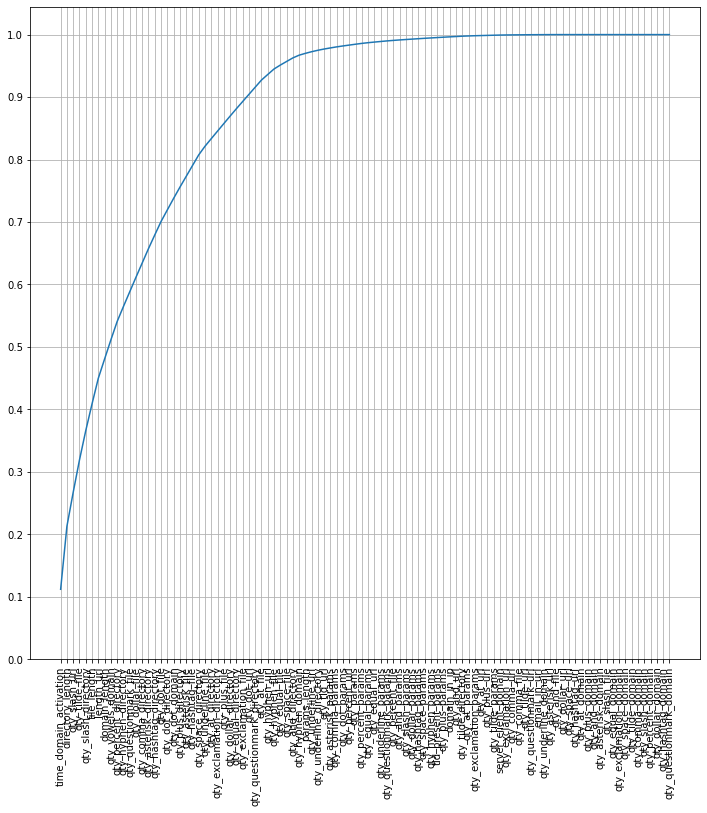

In [44]:
plt.figure(figsize=(12,12))
plt.plot(np.cumsum(imp.sort_values(ascending=False)))
plt.xticks(rotation = '90')
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.show()

In [45]:
cum_sum['qty_comma_params']

0.9803512725143186

In [46]:
list(cum_sum.index).index('qty_comma_params')

44

In [47]:
cum_sum[:40]

time_domain_activation        0.111907
directory_length              0.212696
qty_slash_url                 0.267056
qty_tilde_file                0.318850
qty_slash_directory           0.365769
file_length                   0.408579
length_url                    0.449617
domain_length                 0.480419
qty_vowels_domain             0.511013
qty_percent_directory         0.540458
qty_hyphen_directory          0.564499
qty_questionmark_file         0.587964
qty_dollar_file               0.611364
qty_comma_directory           0.634385
qty_asterisk_directory        0.657365
qty_hashtag_directory         0.679197
qty_dot_file                  0.700754
qty_dot_directory             0.719265
qty_dot_domain                0.737726
qty_plus_directory            0.755564
qty_asterisk_file             0.772850
qty_hashtag_file              0.790114
qty_space_directory           0.807342
qty_underline_file            0.821167
qty_at_directory              0.833353
qty_exclamation_directory

In [48]:
from sklearn.metrics import classification_report

In [49]:
predictions = rf.predict(X_test)

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     11600
           1       0.93      0.94      0.93      6130

    accuracy                           0.95     17730
   macro avg       0.95      0.95      0.95     17730
weighted avg       0.95      0.95      0.95     17730



### Let's see how many features to keep

In [51]:
features_to_keep = [40,50,60,70]

In [52]:
temp = X_train[cum_sum.index[0:features_to_keep[2]]]

In [53]:
rf = RandomForestClassifier()
rf.fit(temp,y_train)

RandomForestClassifier()

In [54]:
predictions = rf.predict(X_test[cum_sum.index[0:features_to_keep[2]]])
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11600
           1       0.93      0.94      0.93      6130

    accuracy                           0.95     17730
   macro avg       0.95      0.95      0.95     17730
weighted avg       0.96      0.95      0.96     17730



In [55]:
cum_sum[0:60]

time_domain_activation        0.111907
directory_length              0.212696
qty_slash_url                 0.267056
qty_tilde_file                0.318850
qty_slash_directory           0.365769
file_length                   0.408579
length_url                    0.449617
domain_length                 0.480419
qty_vowels_domain             0.511013
qty_percent_directory         0.540458
qty_hyphen_directory          0.564499
qty_questionmark_file         0.587964
qty_dollar_file               0.611364
qty_comma_directory           0.634385
qty_asterisk_directory        0.657365
qty_hashtag_directory         0.679197
qty_dot_file                  0.700754
qty_dot_directory             0.719265
qty_dot_domain                0.737726
qty_plus_directory            0.755564
qty_asterisk_file             0.772850
qty_hashtag_file              0.790114
qty_space_directory           0.807342
qty_underline_file            0.821167
qty_at_directory              0.833353
qty_exclamation_directory

# We will keep top 60 features as they seem to be enough to get us good precision and recall

### Among the last 18 features for which we need to rely on external sites, I have decided to keep only time_domain_activation as it is one of the most important features

# Extracting important features 

In [56]:
example_domain = "https://zvento.com/secure/vpass/id/"

#### Domain Activation Time

In [57]:
import whois
def get_time_domain_activation(domain):
    try:
        res = whois.whois(example_domain)
        days= (datetime.datetime.now()-d).days
        return days
    except:
        return -1

In [58]:
get_time_domain_activation(example_domain)

-1

# TTl hostname

In [59]:
import subprocess
import re
def get_ttl(domain):
    try:
        p = subprocess.Popen(["ping",domain], stdout=subprocess.PIPE)
        res=p.communicate()[0]
        pattern = re.compile('TTL=\d*')
        ttl =  pattern.search(str(res)).group()
        return float(ttl.split("=")[1])
    except:
        return -1

In [60]:
get_ttl(example_domain)

-1

### Final Feature Selection and deciding which features to keep

In [61]:
cum_sum[0:60]

time_domain_activation        0.111907
directory_length              0.212696
qty_slash_url                 0.267056
qty_tilde_file                0.318850
qty_slash_directory           0.365769
file_length                   0.408579
length_url                    0.449617
domain_length                 0.480419
qty_vowels_domain             0.511013
qty_percent_directory         0.540458
qty_hyphen_directory          0.564499
qty_questionmark_file         0.587964
qty_dollar_file               0.611364
qty_comma_directory           0.634385
qty_asterisk_directory        0.657365
qty_hashtag_directory         0.679197
qty_dot_file                  0.700754
qty_dot_directory             0.719265
qty_dot_domain                0.737726
qty_plus_directory            0.755564
qty_asterisk_file             0.772850
qty_hashtag_file              0.790114
qty_space_directory           0.807342
qty_underline_file            0.821167
qty_at_directory              0.833353
qty_exclamation_directory

In [62]:
top_60_features = cum_sum.index[0:60]

In [63]:
top_60_features

Index(['time_domain_activation', 'directory_length', 'qty_slash_url',
       'qty_tilde_file', 'qty_slash_directory', 'file_length', 'length_url',
       'domain_length', 'qty_vowels_domain', 'qty_percent_directory',
       'qty_hyphen_directory', 'qty_questionmark_file', 'qty_dollar_file',
       'qty_comma_directory', 'qty_asterisk_directory',
       'qty_hashtag_directory', 'qty_dot_file', 'qty_dot_directory',
       'qty_dot_domain', 'qty_plus_directory', 'qty_asterisk_file',
       'qty_hashtag_file', 'qty_space_directory', 'qty_underline_file',
       'qty_at_directory', 'qty_exclamation_directory', 'qty_plus_file',
       'qty_dollar_directory', 'qty_equal_directory', 'qty_exclamation_file',
       'qty_dot_url', 'qty_questionmark_directory', 'qty_at_file',
       'qty_hyphen_url', 'qty_hyphen_file', 'qty_equal_file', 'qty_space_file',
       'qty_and_directory', 'qty_hyphen_domain', 'params_length',
       'qty_underline_url', 'qty_underline_directory', 'qty_tld_url',
       'q

In [64]:
corelated_features

{'qty_and_directory',
 'qty_and_file',
 'qty_and_params',
 'qty_and_url',
 'qty_asterisk_directory',
 'qty_asterisk_file',
 'qty_asterisk_params',
 'qty_at_directory',
 'qty_at_file',
 'qty_at_params',
 'qty_comma_directory',
 'qty_comma_file',
 'qty_comma_params',
 'qty_dollar_directory',
 'qty_dollar_file',
 'qty_dollar_params',
 'qty_dot_file',
 'qty_equal_directory',
 'qty_equal_file',
 'qty_equal_params',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_exclamation_params',
 'qty_hashtag_directory',
 'qty_hashtag_file',
 'qty_hashtag_params',
 'qty_params',
 'qty_percent_file',
 'qty_plus_directory',
 'qty_plus_file',
 'qty_plus_params',
 'qty_questionmark_file',
 'qty_slash_directory',
 'qty_slash_file',
 'qty_space_directory',
 'qty_space_file',
 'qty_space_params',
 'qty_tilde_directory',
 'qty_tilde_file',
 'qty_tilde_params',
 'qty_underline_file',
 'tld_present_params'}

In [65]:
constant_columns

['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain']

## Constant Columns that are part of top 60 features

In [66]:
set(constant_columns).intersection(set(top_60_features))

set()

There is no constant feature in top 60 features

## Corelation analysis on top 60 features

In [67]:
X_train_top_60 = X_train[top_60_features]

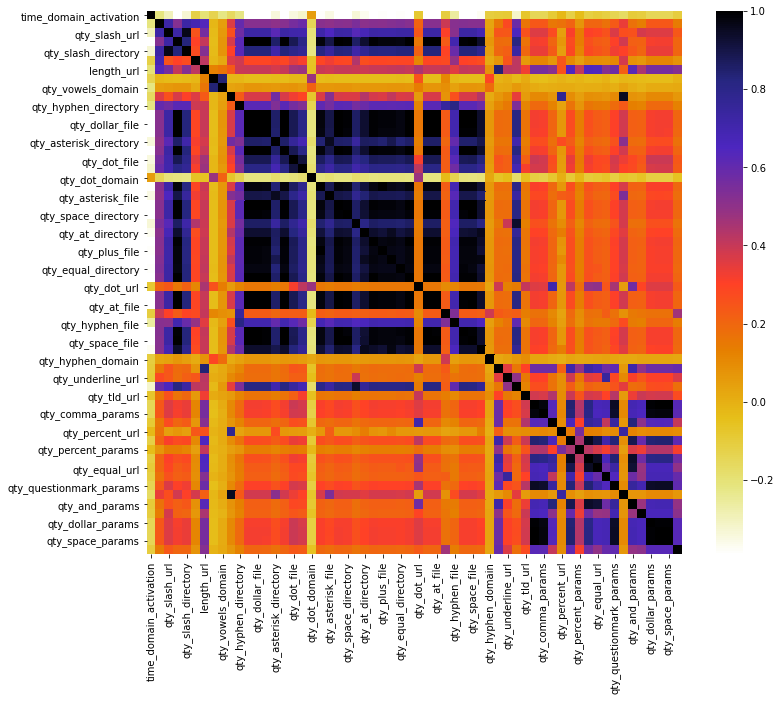

In [68]:
plt.figure(figsize=(12,10))
cor = X_train_top_60.corr()
sns.heatmap(cor, cmap=plt.cm.CMRmap_r)
plt.show()

In [69]:
top_60_corelated_features = get_high_correlation_feature(X_train_top_60,0.85)

In [70]:
len(top_60_corelated_features)

34

In [71]:
X_train_top_60.drop(top_60_corelated_features,axis=1,inplace=True)

C:\Users\rachi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [72]:
X_test_top_60 = X_test[X_train_top_60.columns]

In [73]:
rf = RandomForestClassifier()
rf.fit(X_train_top_60,y_train)


RandomForestClassifier()

In [74]:
predictions = rf.predict(X_test_top_60)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     11600
           1       0.93      0.94      0.93      6130

    accuracy                           0.95     17730
   macro avg       0.95      0.95      0.95     17730
weighted avg       0.95      0.95      0.95     17730



# We are getting good results even after dropping highly corelated features. So we can go ahead with the top 26 features itself

In [75]:
top_features = X_train_top_60.columns

In [76]:
top_features

Index(['time_domain_activation', 'directory_length', 'qty_slash_url',
       'qty_tilde_file', 'file_length', 'length_url', 'domain_length',
       'qty_vowels_domain', 'qty_percent_directory', 'qty_hyphen_directory',
       'qty_dot_domain', 'qty_dot_url', 'qty_hyphen_url', 'qty_hyphen_file',
       'qty_hyphen_domain', 'params_length', 'qty_underline_url',
       'qty_tld_url', 'qty_asterisk_params', 'qty_dot_params',
       'qty_percent_url', 'qty_params', 'qty_percent_params',
       'qty_underline_params', 'qty_slash_params', 'qty_hyphen_params'],
      dtype='object')

# Transformations on final features

In [77]:
numerical_features = [feature for feature in top_features if df[feature].dtype!='O']

In [78]:
discrete_features = [feature for feature in top_features if len(df[feature].unique())<=25]

In [79]:
continuous_features = list(set(numerical_features) - set(discrete_features))

In [80]:
continuous_features

['domain_length',
 'file_length',
 'length_url',
 'qty_percent_directory',
 'qty_hyphen_url',
 'params_length',
 'qty_hyphen_params',
 'qty_percent_url',
 'directory_length',
 'qty_percent_params',
 'qty_vowels_domain',
 'time_domain_activation']

##### Will use EDA to figure out which transformation to use for which feature

## Transformation 1: Use Box Cox Transformation on length_url

In [81]:
df['length_url']

0         25
1        223
2         15
3         81
4         19
        ... 
88642     23
88643     34
88644     70
88645     28
88646     16
Name: length_url, Length: 88647, dtype: int64

In [82]:
import scipy.stats as stat
import pylab 

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


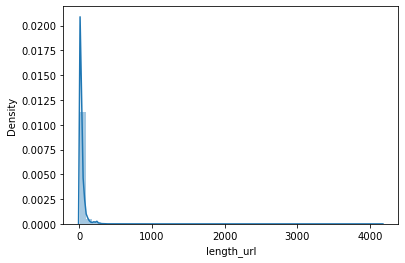

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


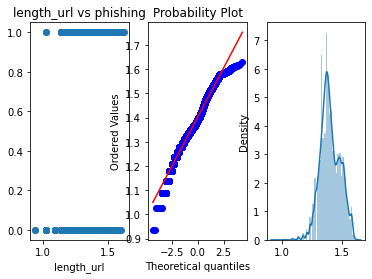

In [83]:
for feature in ['length_url']:
    sns.distplot(df[feature])
    plt.show()
    if 0 in df[feature].unique():
        pass
    else:
        try:
            f, parameters =  stat.boxcox(df[feature])
        except:
            continue
        plt.subplot(1,3,1)
        plt.scatter(f,df['phishing'])
        plt.xlabel(feature)
        
        plt.title(f"{feature} vs phishing")
        plt.subplot(1,3,2)
        stat.probplot(f,dist='norm',plot=pylab)
        
        plt.subplot(1,3,3)
        sns.distplot(f)
        
        plt.show()

#### Clearly this feature is becoming normal now, so using this transformation

### Other features are already normal or we are not able to make other features normal

# Final Pipeline

In [84]:
from sklearn.base import BaseEstimator, TransformerMixin

In [85]:
import scipy.stats as stat
import pylab 

class box_cox_transformation(BaseEstimator, TransformerMixin):
    
    def __init__(self, features, flag):
        self.features = features
        self.flag = flag
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X,y=None):
        #df = X.copy()
        if not self.flag:
            return X
        
        for feature in self.features:
            try:
                # Apply box cox transformations
                X[feature], parameter = stat.boxcox(X[feature])
                print(X[feature])
            except:
                pass
        return X
            
        

In [86]:
from sklearn.pipeline import Pipeline

In [87]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('box_cox_transformation', box_cox_transformation(['length_url'], False)),
    ('std_scaler',StandardScaler())
])

#### Using pipeline

In [88]:
temp = pipeline.fit_transform(df[top_features])

In [89]:
temp

array([[-1.11383416, -0.11734707, -0.14878176, ..., -0.20990297,
        -0.20493599, -0.19169948],
       [-0.9233047 ,  1.27881371,  0.90722979, ...,  2.83772108,
         1.62696484,  1.3874831 ],
       [-1.11383416, -0.40479193, -0.14878176, ..., -0.20990297,
        -0.20493599, -0.19169948],
       ...,
       [-0.50775336,  1.52519502,  1.96324134, ..., -0.20990297,
        -0.20493599, -0.19169948],
       [-1.11383416, -0.40479193, -0.14878176, ..., -0.20990297,
        -0.20493599, -0.19169948],
       [-1.01495594, -0.48691904, -0.67678753, ..., -0.20990297,
        -0.20493599, -0.19169948]])

In [90]:
temp = pd.DataFrame(temp, columns=top_features)

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length_url', ylabel='Density'>

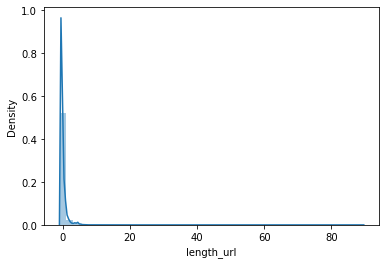

In [91]:
sns.distplot(temp['length_url'])

Now from here on, we can simply use this pipeline to do pre-processing

In [92]:
joblib.dump(pipeline,'preprocess_pipeline.joblib')

['preprocess_pipeline.joblib']